In [1]:
from google.colab import files
files.upload() 

Output hidden; open in https://colab.research.google.com to view.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# combine both test and train data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train_1 = train.copy().drop(['engagement_score'],axis = 1)

In [5]:
print(train_1.shape)
print(test.shape)

(89197, 9)
(11121, 9)


In [6]:
df = pd.concat((train_1,test), axis=0)

In [7]:
df.shape

(100318, 9)

In [8]:
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,1,19990,37,128,24,Male,Student,180,1000
1,2,5304,32,132,14,Female,Student,330,714
2,3,1840,12,24,19,Male,Student,180,138
3,4,12597,23,112,19,Male,Student,220,613
4,5,13626,23,112,27,Male,Working Professional,220,613


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100318 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   row_id       100318 non-null  int64 
 1   user_id      100318 non-null  int64 
 2   category_id  100318 non-null  int64 
 3   video_id     100318 non-null  int64 
 4   age          100318 non-null  int64 
 5   gender       100318 non-null  object
 6   profession   100318 non-null  object
 7   followers    100318 non-null  int64 
 8   views        100318 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 7.7+ MB


In [12]:
# converting the datatpe from int to str

df['user_id'] = df['user_id'].astype(str)
df['category_id'] = df['category_id'].astype(str)
df['video_id'] = df['video_id'].astype(str)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100318 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   row_id       100318 non-null  int64 
 1   user_id      100318 non-null  object
 2   category_id  100318 non-null  object
 3   video_id     100318 non-null  object
 4   age          100318 non-null  int64 
 5   gender       100318 non-null  object
 6   profession   100318 non-null  object
 7   followers    100318 non-null  int64 
 8   views        100318 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 7.7+ MB


# New Features

In [14]:
# counts the no.of rows with same user_id or how many video a user has seen
df['count_user']       = df.groupby('user_id')['user_id'].transform('count')

# counts the no.of rows with same category_id
df['count_category']   = df.groupby('category_id')['category_id'].transform('count')

# counts the no.of rows with same video_id
df['count_video']      = df.groupby('video_id')['video_id'].transform('count')

# counts the no.of rows with same profession
df['count_profession'] = df.groupby('profession')['profession'].transform('count')

# counts the no.of rows with equal no.of followers
df['count_followers']  = df.groupby('followers')['followers'].transform('count')

# a ratio of views to followers
df['view_follower']    = df['views']/df['followers']

# a ratio of no of user with same followers to no of videos with same category
df['follower_category']= df['count_followers']/df['count_category']

# ratio of followers to no of videos a user has seen
df['follower_user']    = df['followers']/df['count_user']

# counts the no.of rows with same gender
df['count_gender']     = df.groupby('gender')['gender'].transform('count')

# ratio of count_gender to followers
df['gender_follower']  = df['count_gender']/ df['followers'] 

# ratio of count_gender to views
df['gender_view']      = df['count_gender']/df['views']

# counts the no.of rows with same age
df['count_age']        = df.groupby('age')['age'].transform('count')



In [15]:
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,count_user,count_category,count_video,count_profession,count_followers,view_follower,follower_category,follower_user,count_gender,gender_follower,gender_view,count_age
0,1,19990,37,128,24,Male,Student,180,1000,3,962,503,50210,7802,5.555556,8.110187,60.000000,58774,326.522222,58.774000,3275
1,2,5304,32,132,14,Female,Student,330,714,5,3137,807,50210,3137,2.163636,1.000000,66.000000,41544,125.890909,58.184874,3480
2,3,1840,12,24,19,Male,Student,180,138,4,4412,644,50210,7802,0.766667,1.768359,45.000000,58774,326.522222,425.898551,5060
3,4,12597,23,112,19,Male,Student,220,613,3,2671,1337,50210,2838,2.786364,1.062523,73.333333,58774,267.154545,95.879282,5060
4,5,13626,23,112,27,Male,Working Professional,220,613,4,2671,1337,19902,2838,2.786364,1.062523,55.000000,58774,267.154545,95.879282,2568


In [16]:
df = df.copy().drop(['row_id'], axis =1)

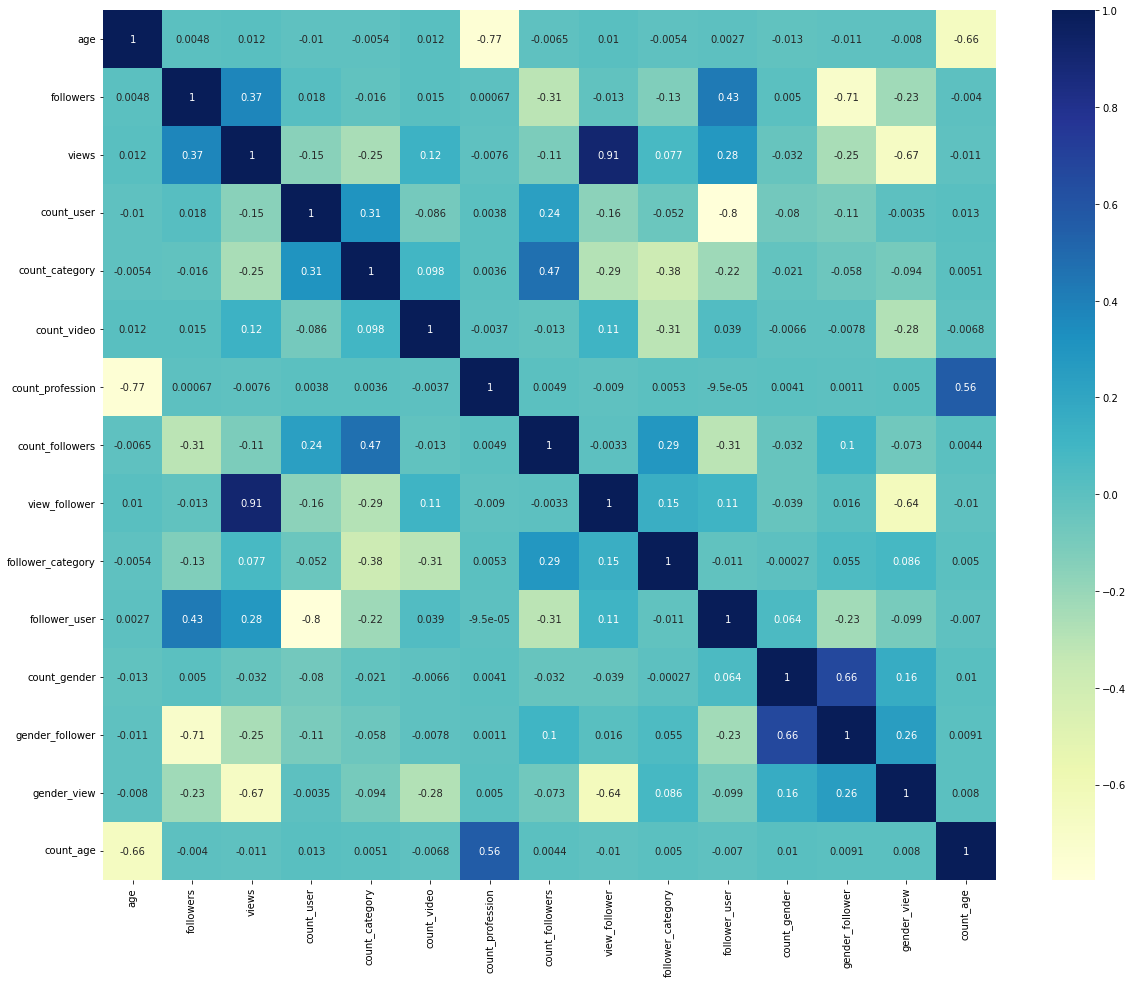

In [17]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


In [18]:
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,count_user,count_category,count_video,count_profession,count_followers,view_follower,follower_category,follower_user,count_gender,gender_follower,gender_view,count_age
0,19990,37,128,24,Male,Student,180,1000,3,962,503,50210,7802,5.555556,8.110187,60.000000,58774,326.522222,58.774000,3275
1,5304,32,132,14,Female,Student,330,714,5,3137,807,50210,3137,2.163636,1.000000,66.000000,41544,125.890909,58.184874,3480
2,1840,12,24,19,Male,Student,180,138,4,4412,644,50210,7802,0.766667,1.768359,45.000000,58774,326.522222,425.898551,5060
3,12597,23,112,19,Male,Student,220,613,3,2671,1337,50210,2838,2.786364,1.062523,73.333333,58774,267.154545,95.879282,5060
4,13626,23,112,27,Male,Working Professional,220,613,4,2671,1337,19902,2838,2.786364,1.062523,55.000000,58774,267.154545,95.879282,2568


# Splitting Test and Train data

In [27]:
# splitting the test and train data after building the new features

df_1 = df.iloc[:89197, :]
print(df_1.shape)

df_2 = df.iloc[89197:, :]
print(df_2.shape)

x_train = df_1
test = df_2

y = train['engagement_score']


(89197, 20)
(11121, 20)


# Encoding the Categorical and Numerical data

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_user = vectorizer.fit_transform(x_train['user_id'].values)
test_user  = vectorizer.transform(test['user_id'].values)

vectorizer_2 = CountVectorizer()
train_category = vectorizer_2.fit_transform(x_train['category_id'].values)
test_category  = vectorizer_2.transform(test['category_id'].values)

vectorizer_3 = CountVectorizer()
train_video = vectorizer_3.fit_transform(x_train['video_id'].values)
test_video  = vectorizer_3.transform(test['video_id'].values)

vectorizer_4 = CountVectorizer()
train_gender = vectorizer_4.fit_transform(x_train['gender'].values)
test_gender  = vectorizer_4.transform(test['gender'].values)

vectorizer_5 = CountVectorizer()
train_profession = vectorizer_5.fit_transform(x_train['profession'].values)
test_profession  = vectorizer_5.transform(test['profession'].values)


In [ ]:
print(train_user.shape)
print(train_category.shape)
print(train_video.shape)
print(train_gender.shape)
print(train_profession.shape)


(89197, 27725)
(89197, 38)
(89197, 166)
(89197, 2)
(89197, 4)


In [30]:
# Min-max scaler or Normalisation - always gives +ve values in range of 0 and 1
from sklearn.preprocessing import MinMaxScaler

normalizer_1=MinMaxScaler()
train_follower = normalizer_1.fit_transform(x_train['followers'].values.reshape(-1,1))
test_follower  = normalizer_1.transform(test['followers'].values.reshape(-1,1))

normalizer_2 = MinMaxScaler()
train_views = normalizer_2.fit_transform(x_train['views'].values.reshape(-1,1))
test_views  = normalizer_2.transform(test['views'].values.reshape(-1,1))

normalizer_3 = MinMaxScaler()
train_age = normalizer_3.fit_transform(x_train['age'].values.reshape(-1,1))
test_age  = normalizer_3.transform(test['age'].values.reshape(-1,1))

normalizer_4=MinMaxScaler()
train_count_user = normalizer_4.fit_transform(x_train['count_user'].values.reshape(-1,1))
test_count_user  = normalizer_4.transform(test['count_user'].values.reshape(-1,1))

normalizer_5 = MinMaxScaler()
train_count_category = normalizer_5.fit_transform(x_train['count_category'].values.reshape(-1,1))
test_count_category  = normalizer_5.transform(test['count_category'].values.reshape(-1,1))

normalizer_6 = MinMaxScaler()
train_count_video = normalizer_6.fit_transform(x_train['count_video'].values.reshape(-1,1))
test_count_video  = normalizer_6.transform(test['count_video'].values.reshape(-1,1))

normalizer_7 = MinMaxScaler()
train_count_profession = normalizer_7.fit_transform(x_train['count_profession'].values.reshape(-1,1))
test_count_profession  = normalizer_7.transform(test['count_profession'].values.reshape(-1,1))

normalizer_8 = MinMaxScaler()
train_count_followers = normalizer_8.fit_transform(x_train['count_followers'].values.reshape(-1,1))
test_count_followers  = normalizer_8.transform(test['count_followers'].values.reshape(-1,1))

normalizer_9 = MinMaxScaler()
train_view_follower = normalizer_9.fit_transform(x_train['view_follower'].values.reshape(-1,1))
test_view_follower  = normalizer_9.transform(test['view_follower'].values.reshape(-1,1))

normalizer_10 = MinMaxScaler()
train_follower_category = normalizer_10.fit_transform(x_train['follower_category'].values.reshape(-1,1))
test_follower_category  = normalizer_10.transform(test['follower_category'].values.reshape(-1,1))

normalizer_11 = MinMaxScaler()
train_follower_user = normalizer_11.fit_transform(x_train['follower_user'].values.reshape(-1,1))
test_follower_user  = normalizer_11.transform(test['follower_user'].values.reshape(-1,1))

normalizer_12 = MinMaxScaler()
train_count_gender = normalizer_12.fit_transform(x_train['count_gender'].values.reshape(-1,1))
test_count_gender  = normalizer_12.transform(test['count_gender'].values.reshape(-1,1))

normalizer_13 = MinMaxScaler()
train_gender_follower = normalizer_13.fit_transform(x_train['gender_follower'].values.reshape(-1,1))
test_gender_follower  = normalizer_13.transform(test['gender_follower'].values.reshape(-1,1))

normalizer_14 = MinMaxScaler()
train_gender_view = normalizer_14.fit_transform(x_train['gender_view'].values.reshape(-1,1))
test_gender_view  = normalizer_14.transform(test['gender_view'].values.reshape(-1,1))

normalizer_15 = MinMaxScaler()
train_count_age = normalizer_15.fit_transform(x_train['count_age'].values.reshape(-1,1))
test_count_age  = normalizer_15.transform(test['count_age'].values.reshape(-1,1))



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100318 entries, 0 to 11120
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            100318 non-null  object 
 1   category_id        100318 non-null  object 
 2   video_id           100318 non-null  object 
 3   age                100318 non-null  int64  
 4   gender             100318 non-null  object 
 5   profession         100318 non-null  object 
 6   followers          100318 non-null  int64  
 7   views              100318 non-null  int64  
 8   count_user         100318 non-null  int64  
 9   count_category     100318 non-null  int64  
 10  count_video        100318 non-null  int64  
 11  count_profession   100318 non-null  int64  
 12  count_followers    100318 non-null  int64  
 13  view_follower      100318 non-null  float64
 14  follower_category  100318 non-null  float64
 15  follower_user      100318 non-null  float64
 16  cou

# Stacking the Features

In [31]:
# merge two sparse matrices
from scipy.sparse import hstack

x_tr = hstack((train_user,train_category, train_video, train_age, train_gender, train_profession, train_follower, train_views, train_count_user, train_count_category, train_count_video, train_count_profession, train_count_followers, train_view_follower, train_follower_category, train_follower_user, train_count_gender, train_gender_follower, train_gender_view, train_count_age)).tocsr()
x_cv = hstack((test_user,test_category, test_video, test_age, test_gender, test_profession, test_follower, test_views, test_count_user, test_count_category, test_count_video, test_count_profession, test_count_followers, test_view_follower, test_follower_category, test_follower_user, test_count_gender, test_gender_follower, test_gender_view, test_count_age)).tocsr()

In [32]:
print(x_tr.shape)
print(x_cv.shape)

(89197, 27950)
(11121, 27950)


# Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 48)

# fit the regressor with x and y data
regressor.fit(x_tr, y) 

RandomForestRegressor(n_jobs=-1, random_state=48)

In [56]:
pred_1 = regressor.predict(x_cv)  # predicting the test data

In [57]:
submission_1 = pd.read_csv('sample_submission.csv')

In [60]:
submission_1["engagement_score"]= pred_1

In [59]:
submission_1.to_csv('submission_11.csv', index=False, header=True)